## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../Resources/data/Mouse_metadata.csv"
study_results_path = "../Resources/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_mouse_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID" )
# Display the data table for preview
df_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
number_of_mice = df_mouse_data["Mouse ID"].nunique()
#df_mouse_data["Mouse ID"].value_counts()
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_number_of_mice = df_mouse_data.duplicated(subset= ['Mouse ID', 'Timepoint'], keep='first')
mouse_and_time =dup_number_of_mice.value_counts()
mouse_and_time

False    1888
True        5
dtype: int64

In [42]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = df_mouse_data.loc[df_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 



In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df_mouse_data = df_mouse_data[df_mouse_data['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_df_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = clean_df_mouse_data["Mouse ID"].nunique()
#df_mouse_data["Mouse ID"].value_counts()
number_of_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_data = clean_df_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_data = clean_df_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_data = clean_df_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd_data = clean_df_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_data = clean_df_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


df = pd.DataFrame({"Average": mean_data, "Median": median_data, "Variance": var_data, "Standard Dev": sd_data, "SEM": sem_data})
df

,Average,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [60]:
mean_data

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.006757,27.135135,17.060811,52.320930,1.013514
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [12]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

clean_df_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median','var','std'])

,mean,median,var,std
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

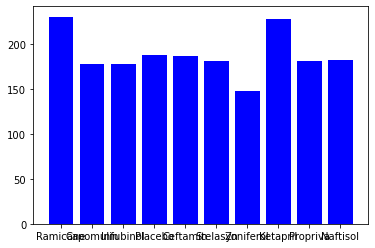

In [56]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#y: count 
#x: drug

x_var = clean_df_mouse_data["Drug Regimen"].unique()
y_var =  clean_df_mouse_data.groupby("Drug Regimen")["Timepoint"].count()
plt.bar(x_var, y_var, color="b", align="center")
plt.show()
#y_var

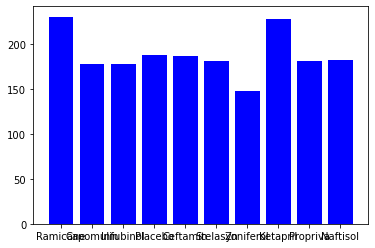

In [57]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_var = clean_df_mouse_data["Drug Regimen"].unique()
y_var =  clean_df_mouse_data.groupby("Drug Regimen")["Timepoint"].count()
plt.bar(x_var, y_var, color="b", align="center")
plt.show()

([<matplotlib.patches.Wedge at 0x28c129510a0>,
 [Text(-0.7320888280116858, -0.8210030133321538, 'Male'),
  Text(0.7320888280116862, 0.8210030133321533, 'Female')],
 [Text(-0.399321178915465, -0.447819825453902, '49.0%'),
  Text(0.39932117891546515, 0.4478198254539018, '51.0%')])

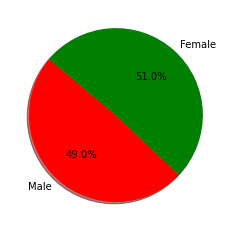

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
x_var = clean_df_mouse_data["Sex"].unique()
y_var =  clean_df_mouse_data["Sex"].count()

sex = clean_df_mouse_data["Sex"].unique()
number_sex = clean_df_mouse_data.groupby("Sex")["Sex"].count()
colors = ["red","green"]
explode = (0,0)

plt.pie(number_sex, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

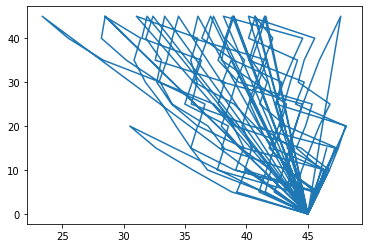

In [125]:
minidf = clean_df_mouse_data[["Tumor Volume (mm3)","Timepoint","Drug Regimen"]]
minidf = minidf.loc[minidf['Drug Regimen'] == "Capomulin"]

x = minidf['Tumor Volume (mm3)']
y = minidf['Timepoint'] 
plt.plot(x, y)

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
